In [1]:
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


In [2]:
(X_Train,_),(_,_)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print(X_Train.shape)

(60000, 28, 28)


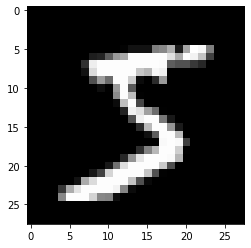

In [4]:
plt.imshow(X_Train[0],cmap='gray')
plt.show()

In [5]:
# Normalise the data
X_Train=(X_Train.astype('float32')-127.5)/127.5
#Here we can see the data is from range -1 to 1
print(np.min(X_Train))
print(np.max(X_Train))

print(X_Train.shape)

-1.0
1.0
(60000, 28, 28)


In [6]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE) 
HALF_BATCH = 128
NOISE_DIM = 100 # Upsample into 784 Dim Vector
from tensorflow import keras
adam = keras.optimizers.Adam(learning_rate=2e-4,beta_1=0.5)



In [7]:
# Generator 
# Input Noise (100 dim) and Outputs a Vector (784 dim)

generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [8]:
# Downsampling 
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

discriminator.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [9]:
# GAN (Step-2)
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [10]:
X_Train = X_Train.reshape(-1,784)
print(X_Train.shape)

(60000, 784)


In [16]:
def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('/content/images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc Loss 0.5541 Generator Loss 1.3473
Epoch 2 Disc Loss 0.5755 Generator Loss 1.2666
Epoch 3 Disc Loss 0.5748 Generator Loss 1.2642
Epoch 4 Disc Loss 0.6063 Generator Loss 1.1596
Epoch 5 Disc Loss 0.6103 Generator Loss 1.1614


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


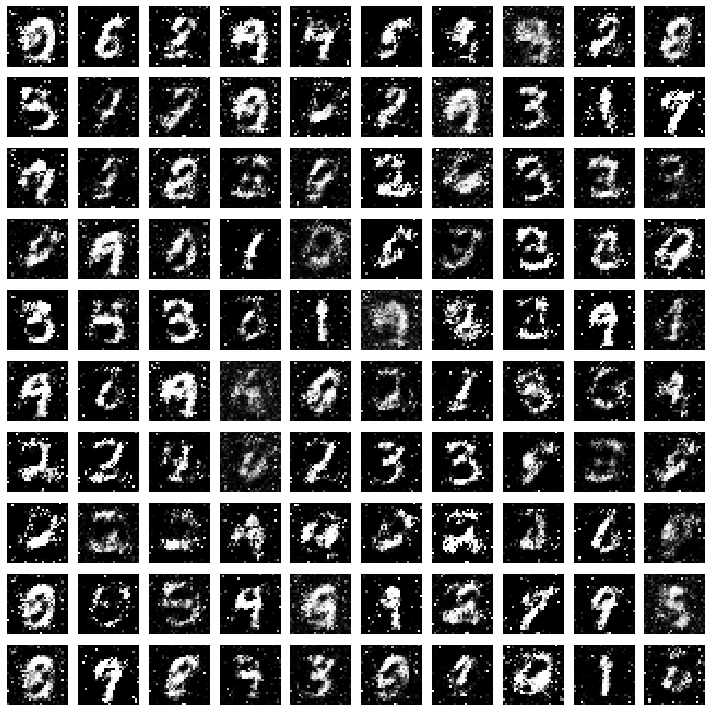

Epoch 6 Disc Loss 0.6198 Generator Loss 1.1130
Epoch 7 Disc Loss 0.6244 Generator Loss 1.0935
Epoch 8 Disc Loss 0.6282 Generator Loss 1.0670
Epoch 9 Disc Loss 0.6324 Generator Loss 1.0629
Epoch 10 Disc Loss 0.6428 Generator Loss 1.0365


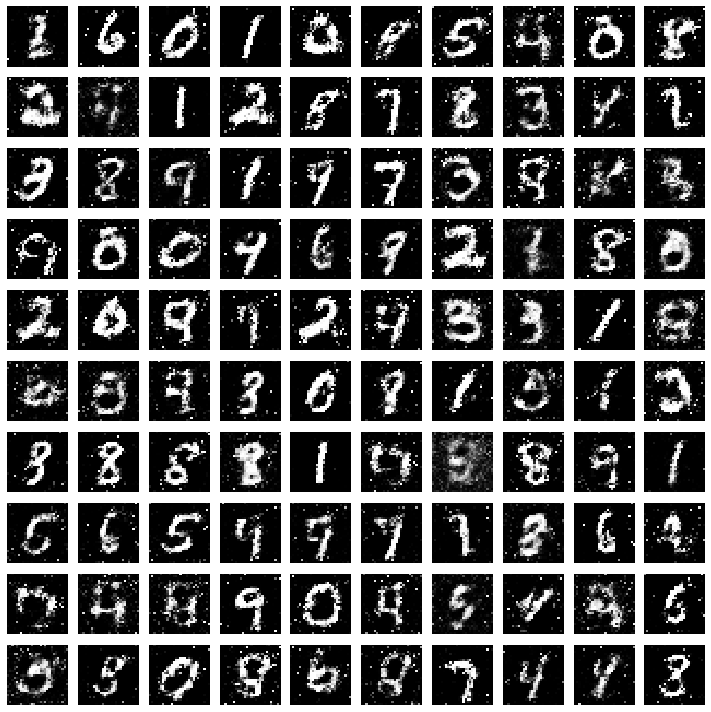

Epoch 11 Disc Loss 0.6443 Generator Loss 1.0252
Epoch 12 Disc Loss 0.6429 Generator Loss 1.0280
Epoch 13 Disc Loss 0.6438 Generator Loss 1.0331
Epoch 14 Disc Loss 0.6479 Generator Loss 1.0198
Epoch 15 Disc Loss 0.6495 Generator Loss 1.0212


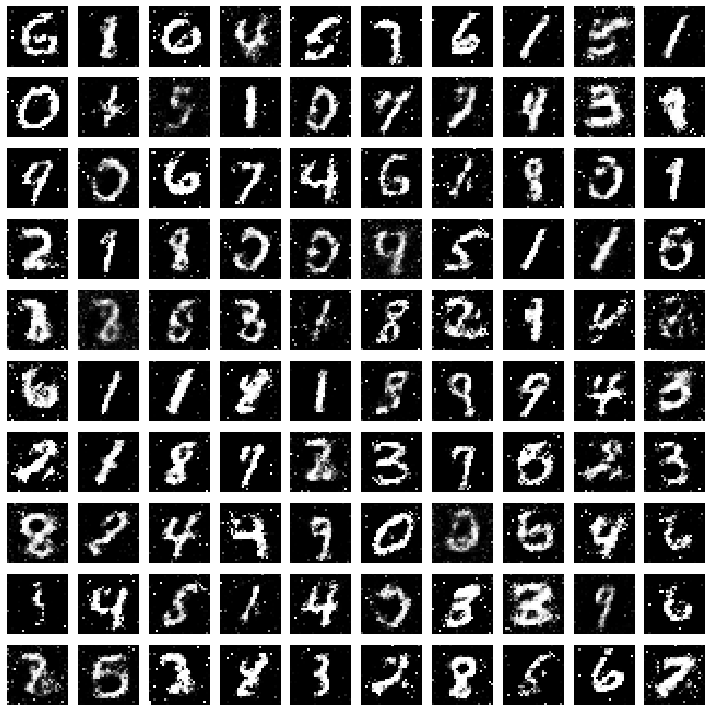

Epoch 16 Disc Loss 0.6516 Generator Loss 1.0159
Epoch 17 Disc Loss 0.6524 Generator Loss 1.0198
Epoch 18 Disc Loss 0.6544 Generator Loss 1.0142
Epoch 19 Disc Loss 0.6549 Generator Loss 1.0100
Epoch 20 Disc Loss 0.6567 Generator Loss 1.0121


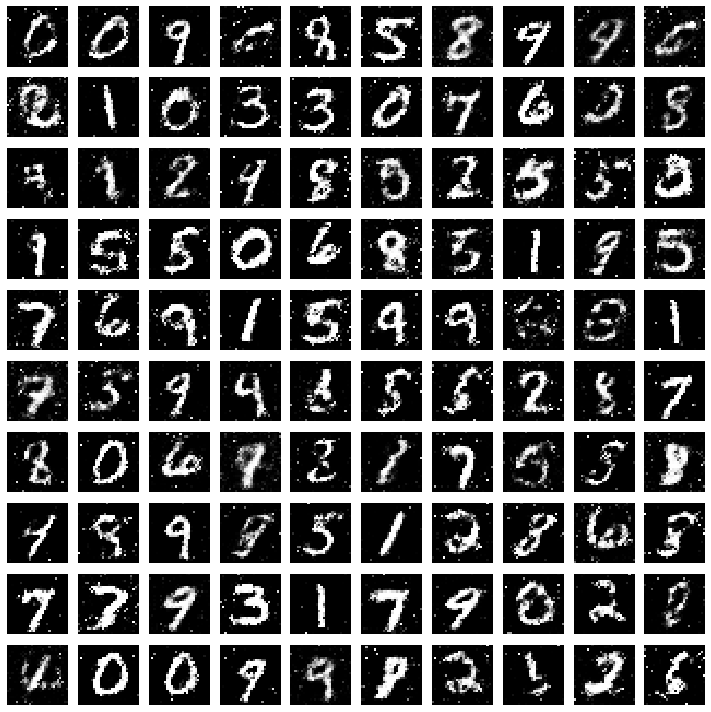

Epoch 21 Disc Loss 0.6576 Generator Loss 1.0043
Epoch 22 Disc Loss 0.6575 Generator Loss 1.0022
Epoch 23 Disc Loss 0.6580 Generator Loss 1.0077
Epoch 24 Disc Loss 0.6610 Generator Loss 0.9976
Epoch 25 Disc Loss 0.6615 Generator Loss 1.0030


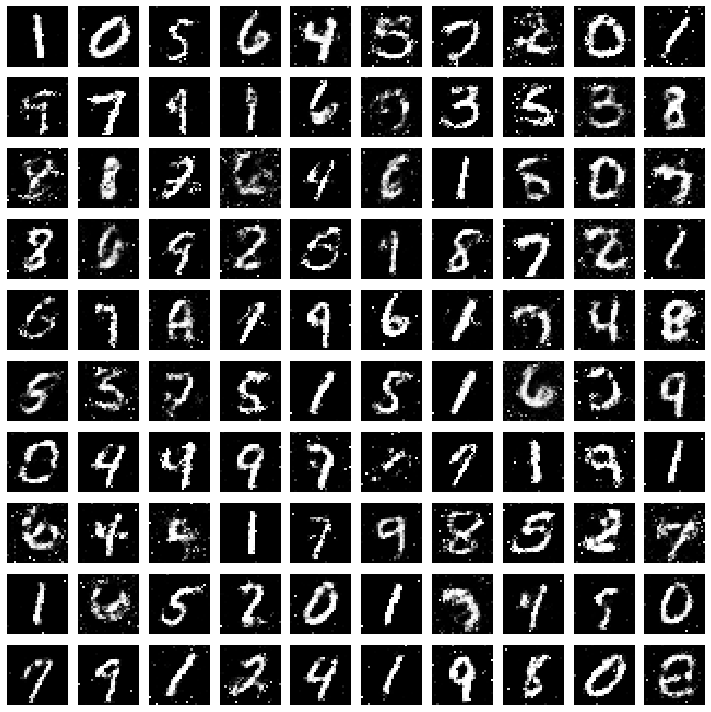

Epoch 26 Disc Loss 0.6625 Generator Loss 0.9951
Epoch 27 Disc Loss 0.6617 Generator Loss 0.9958
Epoch 28 Disc Loss 0.6612 Generator Loss 0.9948
Epoch 29 Disc Loss 0.6634 Generator Loss 0.9950
Epoch 30 Disc Loss 0.6628 Generator Loss 0.9957


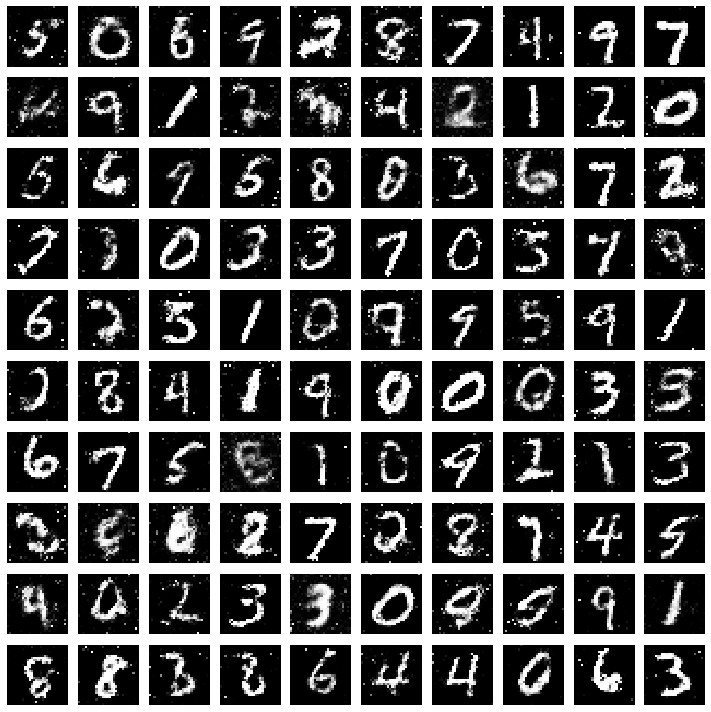

Epoch 31 Disc Loss 0.6629 Generator Loss 0.9937
Epoch 32 Disc Loss 0.6617 Generator Loss 0.9877
Epoch 33 Disc Loss 0.6641 Generator Loss 0.9930
Epoch 34 Disc Loss 0.6638 Generator Loss 1.0008
Epoch 35 Disc Loss 0.6627 Generator Loss 0.9903


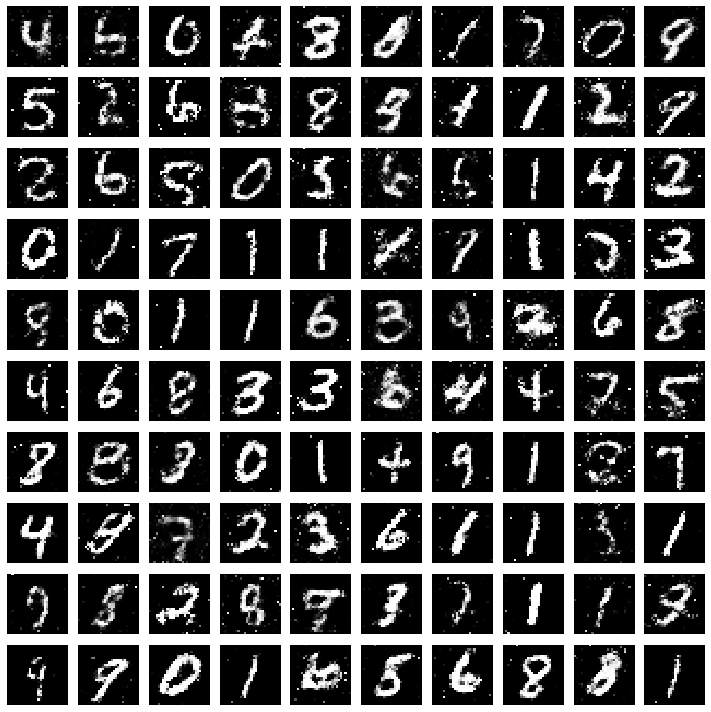

Epoch 36 Disc Loss 0.6639 Generator Loss 0.9953
Epoch 37 Disc Loss 0.6647 Generator Loss 0.9877
Epoch 38 Disc Loss 0.6650 Generator Loss 0.9851
Epoch 39 Disc Loss 0.6635 Generator Loss 0.9913
Epoch 40 Disc Loss 0.6658 Generator Loss 0.9886


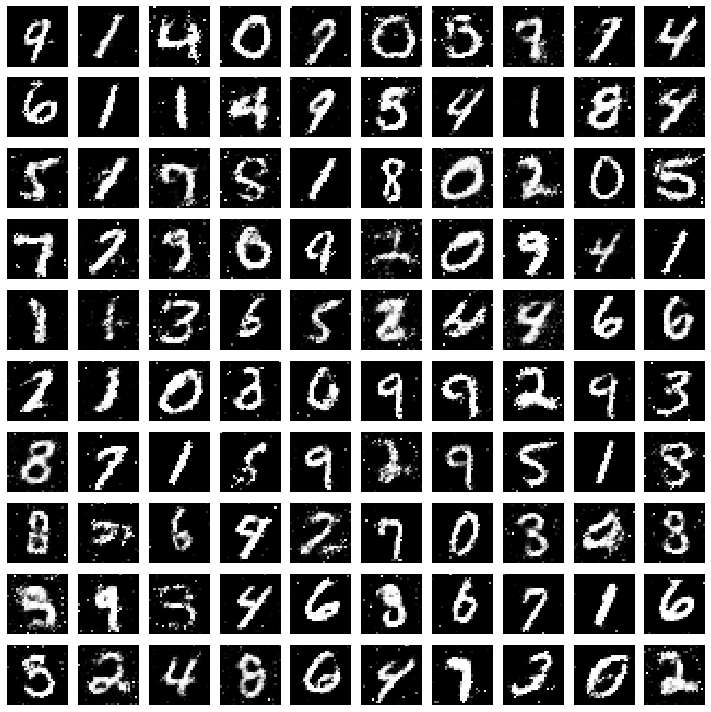

Epoch 41 Disc Loss 0.6642 Generator Loss 0.9843
Epoch 42 Disc Loss 0.6651 Generator Loss 0.9851
Epoch 43 Disc Loss 0.6643 Generator Loss 0.9891
Epoch 44 Disc Loss 0.6655 Generator Loss 0.9876
Epoch 45 Disc Loss 0.6652 Generator Loss 0.9848


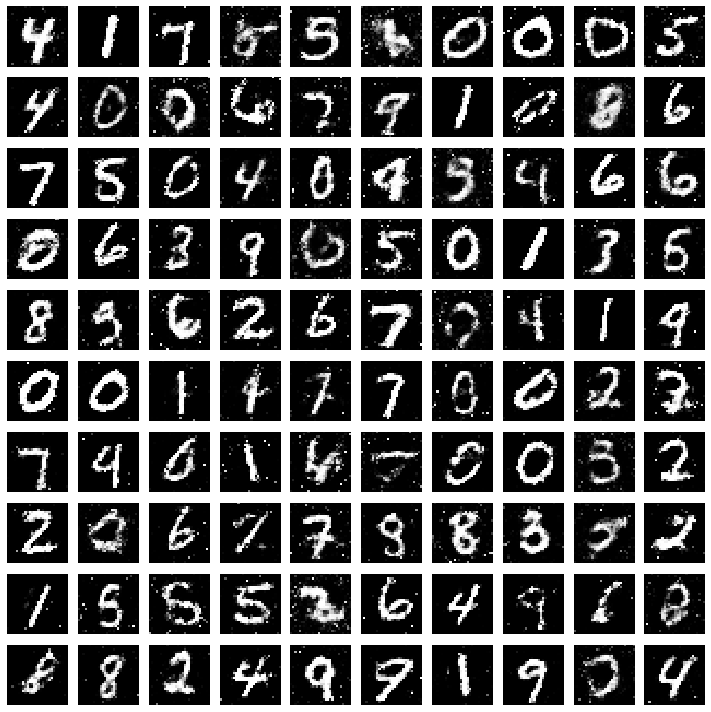

Epoch 46 Disc Loss 0.6652 Generator Loss 0.9846
Epoch 47 Disc Loss 0.6666 Generator Loss 0.9867
Epoch 48 Disc Loss 0.6648 Generator Loss 0.9833
Epoch 49 Disc Loss 0.6664 Generator Loss 0.9845
Epoch 50 Disc Loss 0.6664 Generator Loss 0.9814


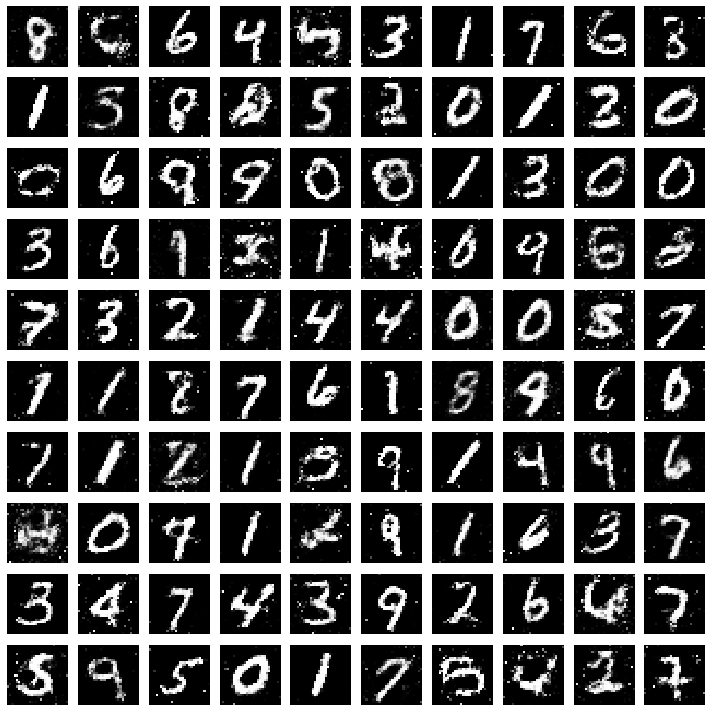

In [17]:

# Training Loop
d_losses = []
g_losses = []


for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    #Mini Batch SGD
    for step in range(NO_OF_BATCHES):
        
        # Step-1 Discriminator 
        # 50% Real Data + 50% Fake Data
        
        #Real Data X
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH)
        real_imgs = X_Train[idx]
        
        #Fake Data X
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise) #Forward 
        
        
        # Labels 
        real_y = np.ones((HALF_BATCH,1))*0.9 #One Side Label Smoothing for Discriminator
        fake_y = np.zeros((HALF_BATCH,1))
        
        # Train our Discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        # Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if (epoch+1)%5==0:
        generator.save('/content/model/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)
        
        
        
        

In [15]:
!mkdir images